In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (15,8)

In [3]:
air = pd.read_csv("./data/AirPassengers.csv", header=None)

In [4]:
air.columns = ['Date', 'Passengers']

In [5]:
print(air)

        Date  Passengers
0    1949-01         112
1    1949-02         118
2    1949-03         132
3    1949-04         129
4    1949-05         121
..       ...         ...
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432

[144 rows x 2 columns]


In [6]:
air['Smooth.5'] = air.ewm(alpha=0.5).mean().Passengers
air['Smooth.1'] = air.ewm(alpha=0.9).mean().Passengers

In [7]:
air['Date'] = pd.to_datetime(air['Date'], format='%Y-%m')

In [12]:
air

          Date  Passengers    Smooth.5    Smooth.1
0   1949-01-01         112  112.000000  112.000000
1   1949-02-01         118  116.000000  117.454545
2   1949-03-01         132  125.142857  130.558559
3   1949-04-01         129  127.200000  129.155716
4   1949-05-01         121  124.000000  121.815498
..         ...         ...         ...         ...
139 1960-08-01         606  582.096411  606.665454
140 1960-09-01         508  545.048205  517.866545
141 1960-10-01         461  503.024103  466.686655
142 1960-11-01         390  446.512051  397.668665
143 1960-12-01         432  439.256026  428.566867

[144 rows x 4 columns]


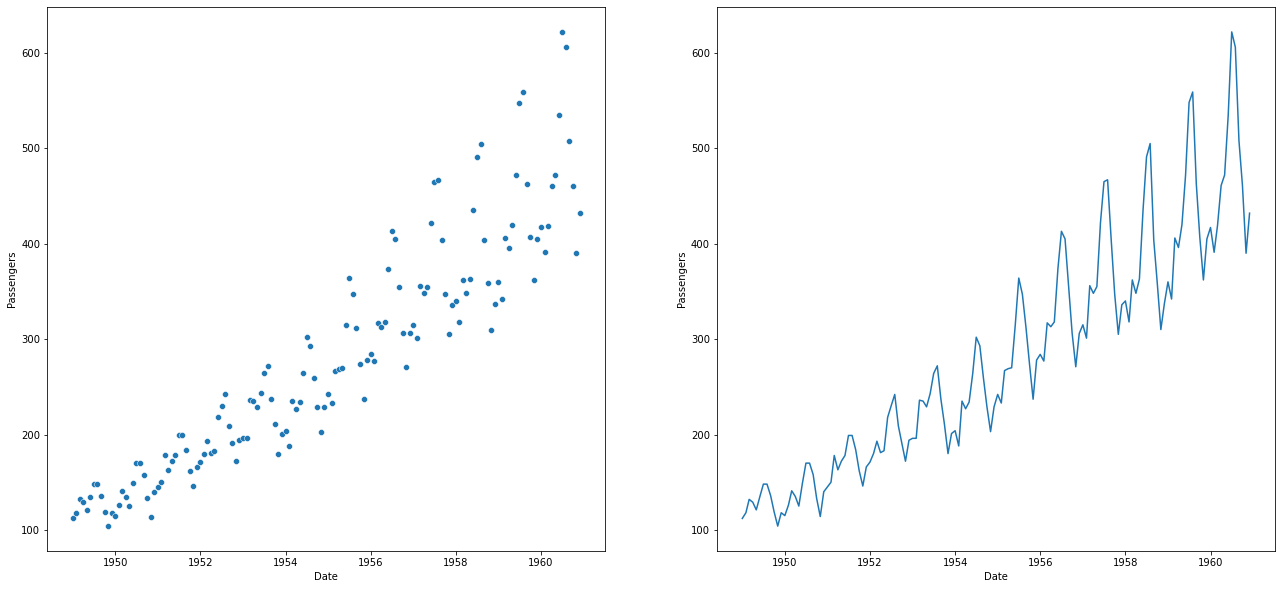

In [9]:
fig, ax = plt.subplots(1, 2 ,figsize=(22, 10))

sns.scatterplot(data=air, x='Date', y='Passengers', ax=ax[0])
sns.lineplot(data=air, x='Date', y='Passengers', ax=ax[1])

plt.show()

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

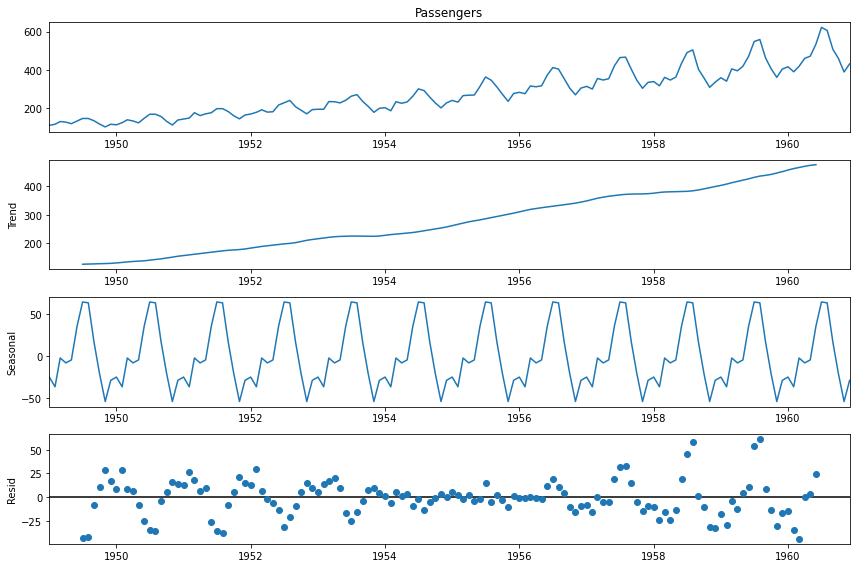

In [11]:
tmp = air.set_index('Date')
ts = tmp.Passengers
result = seasonal_decompose(ts, model='additive')


plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()